In [1]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots. 
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [2]:
# load the bert embeddings
embeddings1 = np.load('embeddings_1.npy')
#embeddings2 = np.load('chunk_2/embs_chunk_2.npy')
# load the codes
with open('icd_codes_1.txt', 'rt') as file:
    codes1 = [line.strip('\n').split(';') for line in file.readlines()]
#with open('chunk_2/icd_codes_chunk_2.txt', 'rt') as file:
#    codes2 = [line.strip('\n').split(';') for line in file.readlines()]

embeddings = embeddings1 #np.concatenate((embeddings1, embeddings2))
codes = codes1 #+ codes2

# convert the list to numpy array
codes = [np.array(_) for _ in codes]

# remove Z12.11
codes = [code[code != 'Z12.11'] for code in codes]
    

In [3]:
# flatten the codes to get the code distribution
codes_flat = np.concatenate(codes)
# extract the unique codes with their respective counts
codes_uniq, counts = np.unique(codes_flat, return_counts=True)
# sort the counts in descending order
sorted_indices = np.argsort(counts)[::-1]
# display the top frequent codes with counts.
for code, count in zip(codes_uniq[sorted_indices[:173]], counts[sorted_indices[:173]]):
    print (code, count)

K57.30 5706
Z86.010 4129
K63.5 4106
K64.8 3165
M54.50 2780
K44.9 2622
K40.90 2592
D12.3 2222
Z41.1 2082
K31.89 2056
Z98.890 1991
D12.2 1925
K29.50 1793
M48.061 1695
K64.0 1644
Z80.0 1584
K62.1 1573
D12.5 1508
K02.9 1435
R13.10 1425
K42.9 1420
G89.18 1420
M51.16 1374
N84.0 1356
D12.0 1310
N64.82 1253
K22.89 1233
M47.816 1205
Z31.41 1171
D12.4 1156
Z85.3 1144
L72.0 1121
E88.1 1098
K80.10 1091
K21.00 1083
L98.7 1044
H25.811 1040
H25.812 1038
N20.0 1019
K21.9 1017
N64.81 1001
K64.4 992
K22.2 989
M54.16 974
N62 957
Z87.19 954
H65.23 911
K31.7 908
K52.9 887
G89.29 872
J34.3 867
J35.3 859
H26.9 845
L90.5 820
N47.1 791
N20.1 786
Z90.13 764
M17.11 732
J34.2 731
K82.8 725
K92.1 722
N92.0 718
M17.12 713
H40.9 705
N64.89 674
D12.8 663
K29.70 653
K80.20 652
K42.0 648
R10.13 646
H69.83 645
Z46.6 642
Z45.2 641
F43.0 616
D17.6 612
K22.70 601
M79.605 580
K62.89 578
M54.2 566
H02.831 563
J34.89 560
H02.834 558
K40.20 547
J35.03 545
O02.1 545
K63.89 544
K20.90 543
K64.9 543
Z30.2 532
M79.18 531
N94.6 531

In [22]:
SELECTED_CODE = 'K57.30' #"K57.30"

In [23]:
print("# total data points:", len(embeddings))
data = list(filter(lambda x: np.argwhere(np.array(x[1])==SELECTED_CODE).shape[0] > 0 and len(x[1])==2, zip(embeddings, codes)))
print("# data points:", len(data))

# total data points: 99491
# data points: 846


In [24]:
data[456][1]

array(['K57.30', 'D12.4'], dtype='<U6')

In [25]:
X = np.array([x[0] for x in data])
y = [x[1] for x in data]


In [26]:
tsne = TSNE(n_components=2, random_state=13, n_jobs=8, metric='l2') # l1, l2, braycurtis, cosine, euclidean, chebyshev,correlation, nan_euclidean, 
X_proj = tsne.fit_transform(X)

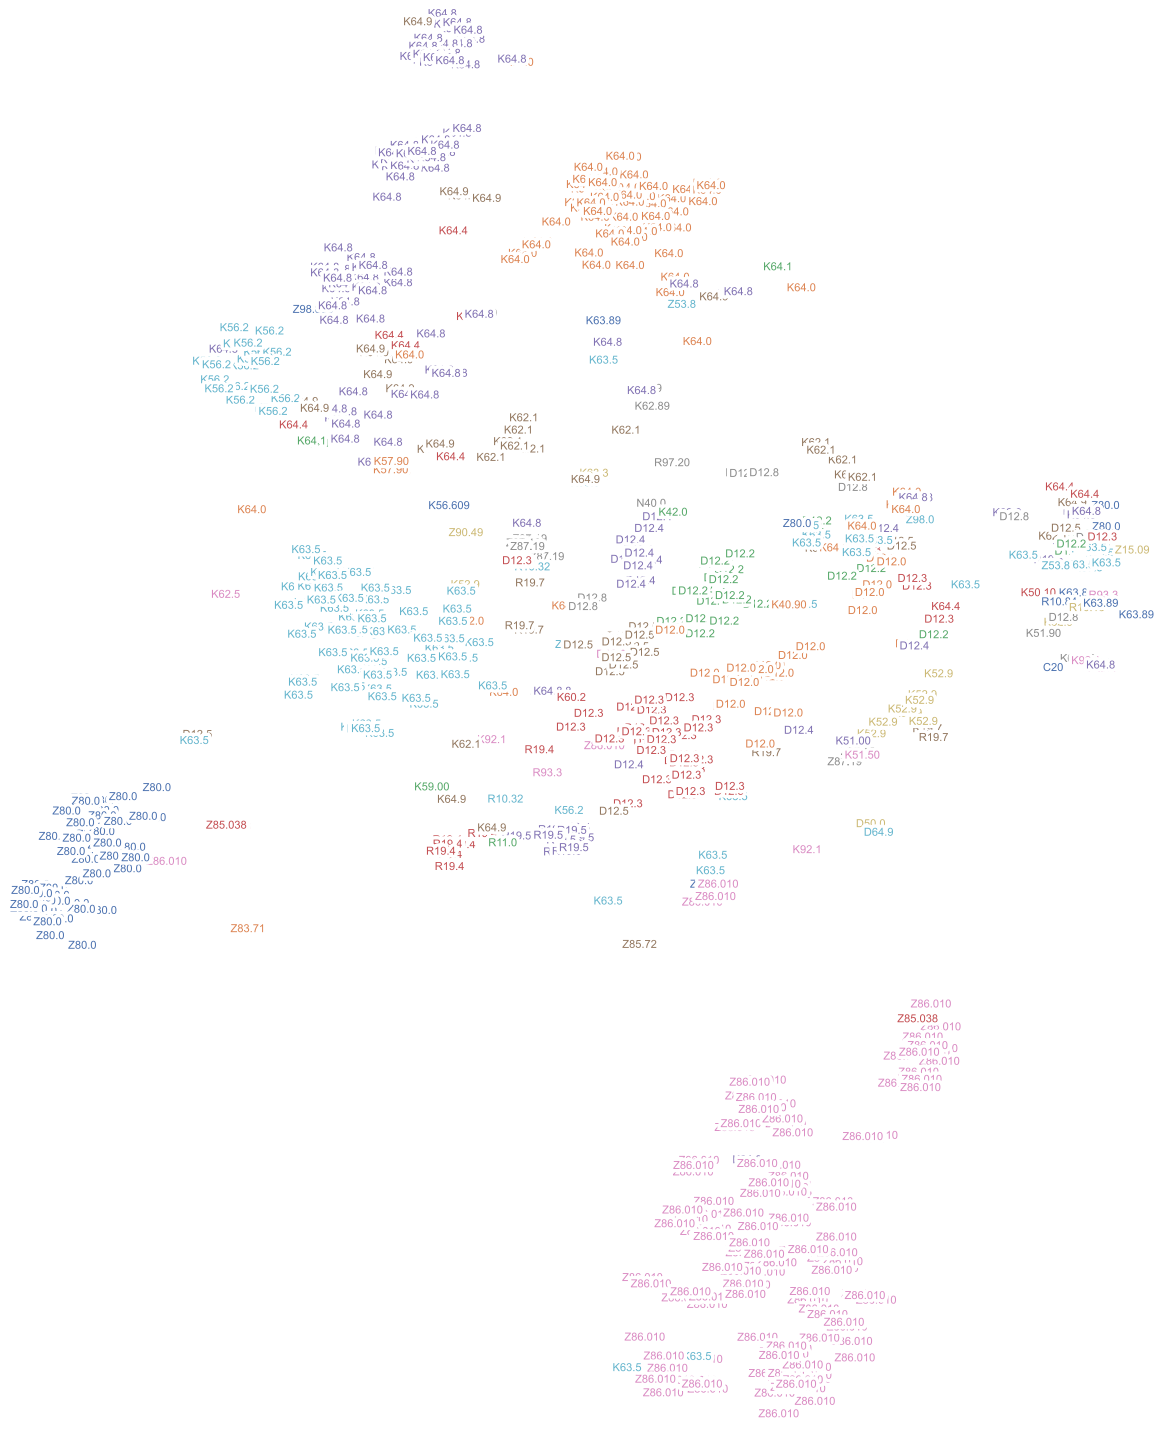

In [27]:
colors = np.array([len(_) for _ in y])
yprime = ["_".join(p[p!=SELECTED_CODE]) for p in y]

yp_uniq = np.unique(yprime)
yp_uniq_dict = {c[1]:c[0] for c in enumerate(yp_uniq)}

# We choose a color palette with seaborn.
palette = np.array(sns.color_palette("deep", len(yp_uniq)))

    # We create a scatter plot.
f = plt.figure(figsize=(10, 10))
ax = plt.subplot(aspect='equal')
#sc = ax.scatter(X_proj[:,0], X_proj[:,1], lw=0, s=30,
#                c=palette[colors.astype(int)])

plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')

for i, x in enumerate(X_proj):
    txt = ax.text(x[0], x[1], yprime[i], fontsize=8, c = palette[yp_uniq_dict[yprime[i]]])
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=5, foreground="w"),
        PathEffects.Normal()])
